In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Sentiment Model

In [3]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# import torch

In [4]:
from transformers.models.bert.modeling_bert import BertModel,BertForMaskedLM

In [5]:
#for bert
"""
    We are using pretrained 'bert-base-multilingual-uncased-sentiment' model
    for predicting the sentiment of the review as a number of stars (between 1 and 5)
    """;
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [6]:
# Vader sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # for polarity score
analyser = SentimentIntensityAnalyzer()

#  following functions returns positive, negative, neutral emotion score of the text respectively. 
  
def pos(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['pos']

def neg(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neg']

def neu(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neu']

# Tweets preprocessing and analysis

In [7]:
df=pd.read_csv('./IndianElection19TwitterData.csv',index_col=0)
df

,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
...,...,...,...
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...
142562,2019-03-06 10:11:43+00:00,RAMANKAIRA,@DrKumarVishwas Early morning #political move ...
142563,2019-01-24 12:57:48+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...
142564,2019-01-24 12:48:37+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...


# Modi Tweets

In [8]:
modi = ["Modi", "PM", "modi", "#PMModi", "modi ji", "narendra modi", "@narendramodi", "#Vote4Modi"]
modi_df = pd.DataFrame(columns=["Date", "User", "Tweet"])

def ismodi(tweet):
    t = tweet.split()
    return any(i in t for i in modi)

new_rows = []
for row in df.values:
    if ismodi(str(row[2])):
        new_rows.append({"Date": row[0], "User": row[1], "Tweet": row[2]})

modi_df = pd.concat([modi_df, pd.DataFrame(new_rows)], ignore_index=True)
modi_df

,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
4,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...
...,...,...,...
25678,2019-04-09 12:06:31+00:00,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...
25679,2019-03-29 15:42:44+00:00,SONUPINKOO,I am seriously worried about future of Indian ...
25680,2019-03-29 13:28:51+00:00,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...
25681,2019-03-23 05:06:36+00:00,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ..."


In [9]:
modi_df['Tweet'].nunique()# all tweets are unique

25683

# Rahul gandhi tweets

In [10]:
rahul = ["rahul", "Rahul", "RahulGandhi", "gandhi", "@RahulGandhi", "Gandhi",
         "#Vote4Rahul", "#Vote4Gandhi", "#Vote4RahulGandhi"]
rahul_df = pd.DataFrame(columns=["Date", "User", "Tweet"])

def israhul(tweet):
    t = tweet.split()
    return any(i in t for i in rahul)

new_rows = []
for row in df.values:
    if israhul(str(row[2])):
        new_rows.append({"Date": row[0], "User": row[1], "Tweet": row[2]})

rahul_df = pd.concat([rahul_df, pd.DataFrame(new_rows)], ignore_index=True)
rahul_df

,Date,User,Tweet
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,2019-05-18 18:52:03+00:00,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,2019-05-18 18:31:10+00:00,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...
...,...,...,...
14143,2019-03-23 04:53:54+00:00,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ..."
14144,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...
14145,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...
14146,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...


In [11]:
rahul_df['Tweet'].nunique()

14148

# Data cleaning (removing stopwords and punctuations)

In [12]:
from sklearn.feature_extraction import text
import string
stop = text.ENGLISH_STOP_WORDS

#  Removing stopwords (as in sklearn library) from tweets so as to get good polarity scores

modi_df['Tweet'] = modi_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
rahul_df['Tweet'] = rahul_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

#  Removing panctuations from tweets

modi_df['Tweet'] = modi_df['Tweet'].apply(remove_punctuations)
rahul_df['Tweet'] = rahul_df['Tweet'].apply(remove_punctuations)

# VadarSentiment for modi tweets

In [13]:
modi_df['pos'] = modi_df['Tweet'].apply(lambda x :pos(x))
modi_df['neg'] = modi_df['Tweet'].apply(lambda x :neg(x))
modi_df['neu'] = modi_df['Tweet'].apply(lambda x :neu(x))

In [14]:
emotion=[]
for i in range(0,25683):
    emotion.append(max(modi_df['pos'][i],modi_df['neu'][i],modi_df['neg'][i]))

modi_df['FinalEmotion']=emotion

#  Traversing through the polarity scores for each tweet and
#  assigning the Final Emotion as per the highest score among positive, negative, neutral
    
for i in range(0,25683):
    if modi_df['FinalEmotion'][i]==modi_df['pos'][i]:
        modi_df['FinalEmotion'][i]='positive'
    elif modi_df['FinalEmotion'][i]==modi_df['neg'][i]:
        modi_df['FinalEmotion'][i]='negative' 
    elif modi_df['FinalEmotion'][i]==modi_df['neu'][i]:
        modi_df['FinalEmotion'][i]='neutral'
modi_df

C:\Users\haris\AppData\Local\Temp\ipykernel_16208\1855039842.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_df['FinalEmotion'][i]='neutral'


,Date,User,Tweet,pos,neg,neu,FinalEmotion
0,2019-05-18 23:50:47+00:00,advosushildixit,anjanaomkashyap I seeing future bjp spokespers...,0.307,0.000,0.693,neutral
1,2019-05-18 23:00:03+00:00,jiaeur,LokSabhaElections2019 23rd May 2019 reveal Ev...,0.228,0.000,0.772,neutral
2,2019-05-18 22:53:54+00:00,PVenkatGandhi,LokSabhaElections2019 23rd May 2019 reveal Ev...,0.228,0.000,0.772,neutral
3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates new record PM democratic count...,0.313,0.000,0.687,neutral
4,2019-05-18 21:22:29+00:00,ShakeChilli,abhijitmajumder Appointment Successor God forb...,0.215,0.110,0.675,neutral
...,...,...,...,...,...,...,...
25678,2019-04-09 12:06:31+00:00,shv_indian,1DDrive ModiSpeaksToNews18 LokSabhaElections20...,0.000,0.136,0.864,neutral
25679,2019-03-29 15:42:44+00:00,SONUPINKOO,I seriously worried future Indian democracy na...,0.276,0.109,0.615,neutral
25680,2019-03-29 13:28:51+00:00,SONUPINKOO,If narendramodi Bad Why does INCIndia needs Ma...,0.000,0.156,0.844,neutral
25681,2019-03-23 05:06:36+00:00,SONUPINKOO,On 23rd March Pakistan Day I Urge Indians Dere...,0.000,0.000,1.000,neutral


In [15]:
modi_df['FinalEmotion'].value_counts()

neutral     24994
positive      532
negative      157
Name: FinalEmotion, dtype: int64

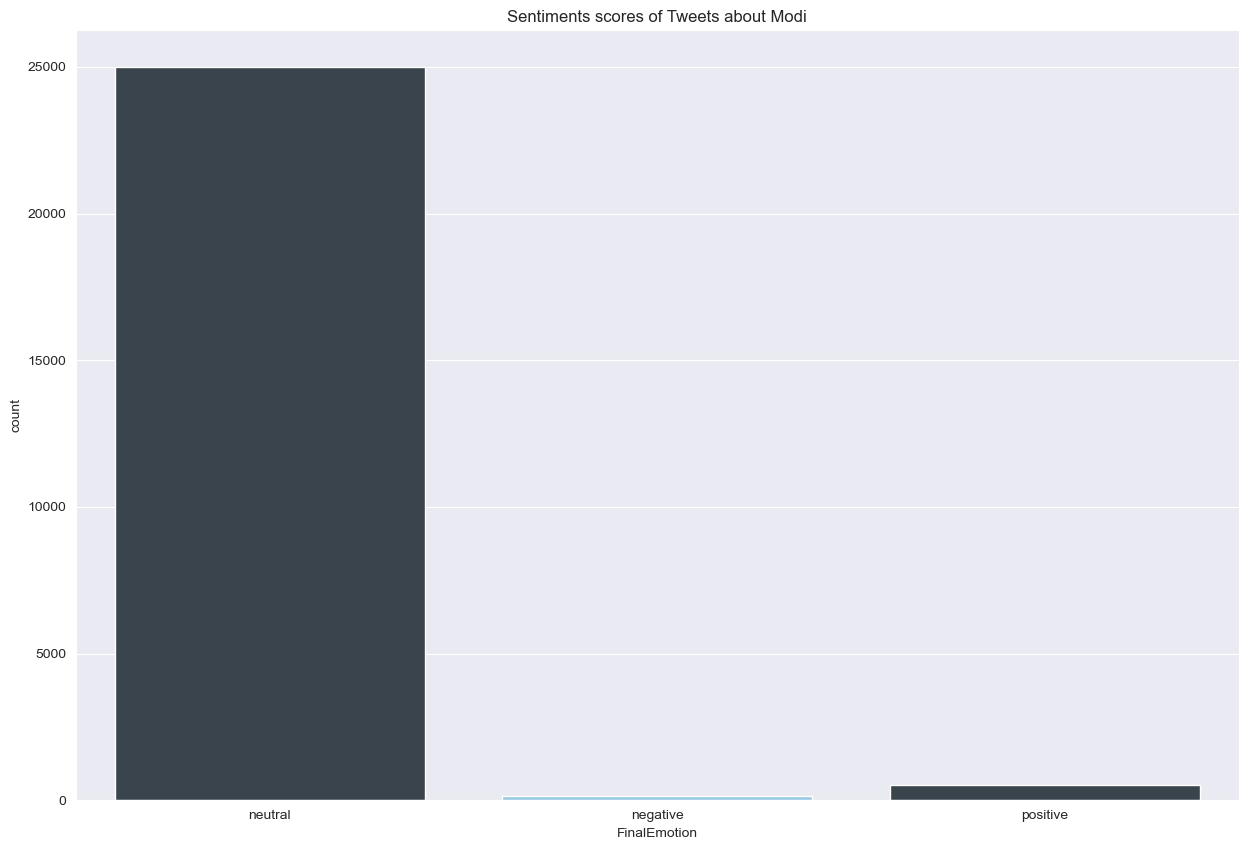

In [16]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=modi_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiments scores of Tweets about Modi')
plt.show()

# VadarSentiment on rahul tweets

In [17]:
rahul_df['pos'] = rahul_df['Tweet'].apply(lambda x :pos(x))
rahul_df['neg'] = rahul_df['Tweet'].apply(lambda x :neg(x))
rahul_df['neu'] = rahul_df['Tweet'].apply(lambda x :neu(x))

In [18]:
rahul_df

,Date,User,Tweet,pos,neg,neu
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder academic journalist asks INC India Rahu...,0.093,0.138,0.769
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats change australiavotes2019 ScottMorris...,0.152,0.000,0.848
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...,0.000,0.000,1.000
3,2019-05-18 18:52:03+00:00,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...,0.318,0.000,0.682
4,2019-05-18 18:31:10+00:00,VandanaMegastar,LokSabhaElections2019 Anyone having mass backi...,0.083,0.088,0.828
...,...,...,...,...,...,...
14143,2019-03-23 04:53:54+00:00,SunjayJK,quizzicalguy In LokSabhaElections2019 India Ec...,0.194,0.000,0.806
14144,2019-03-17 08:53:28+00:00,SunjayJK,AnumaVidisha RahulGandhi ArvindKejriwal Spokes...,0.196,0.068,0.737
14145,2019-03-06 10:20:09+00:00,RAMANKAIRA,sherryontopp Early morning political detailed ...,0.097,0.000,0.903
14146,2019-03-06 10:18:02+00:00,RAMANKAIRA,mayankgandhi04 mallesh2004 Early morning polit...,0.094,0.000,0.906


In [19]:
emotion=[]
for i in range(0,14148):
    emotion.append(max(rahul_df['pos'][i],rahul_df['neu'][i],rahul_df['neg'][i]))

rahul_df['FinalEmotion']=emotion
for i in range(0,14148):
    if rahul_df['FinalEmotion'][i]==rahul_df['pos'][i]:
        rahul_df['FinalEmotion'][i]='positive'
    elif rahul_df['FinalEmotion'][i]==rahul_df['neg'][i]:
        rahul_df['FinalEmotion'][i]='negative'
    elif rahul_df['FinalEmotion'][i]==rahul_df['neu'][i]:
        rahul_df['FinalEmotion'][i]='neutral'
rahul_df

C:\Users\haris\AppData\Local\Temp\ipykernel_16208\224640801.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul_df['FinalEmotion'][i]='neutral'


,Date,User,Tweet,pos,neg,neu,FinalEmotion
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder academic journalist asks INC India Rahu...,0.093,0.138,0.769,neutral
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats change australiavotes2019 ScottMorris...,0.152,0.000,0.848,neutral
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...,0.000,0.000,1.000,neutral
3,2019-05-18 18:52:03+00:00,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...,0.318,0.000,0.682,neutral
4,2019-05-18 18:31:10+00:00,VandanaMegastar,LokSabhaElections2019 Anyone having mass backi...,0.083,0.088,0.828,neutral
...,...,...,...,...,...,...,...
14143,2019-03-23 04:53:54+00:00,SunjayJK,quizzicalguy In LokSabhaElections2019 India Ec...,0.194,0.000,0.806,neutral
14144,2019-03-17 08:53:28+00:00,SunjayJK,AnumaVidisha RahulGandhi ArvindKejriwal Spokes...,0.196,0.068,0.737,neutral
14145,2019-03-06 10:20:09+00:00,RAMANKAIRA,sherryontopp Early morning political detailed ...,0.097,0.000,0.903,neutral
14146,2019-03-06 10:18:02+00:00,RAMANKAIRA,mayankgandhi04 mallesh2004 Early morning polit...,0.094,0.000,0.906,neutral


In [20]:
rahul_df['FinalEmotion'].value_counts()


neutral     13817
positive      225
negative      106
Name: FinalEmotion, dtype: int64

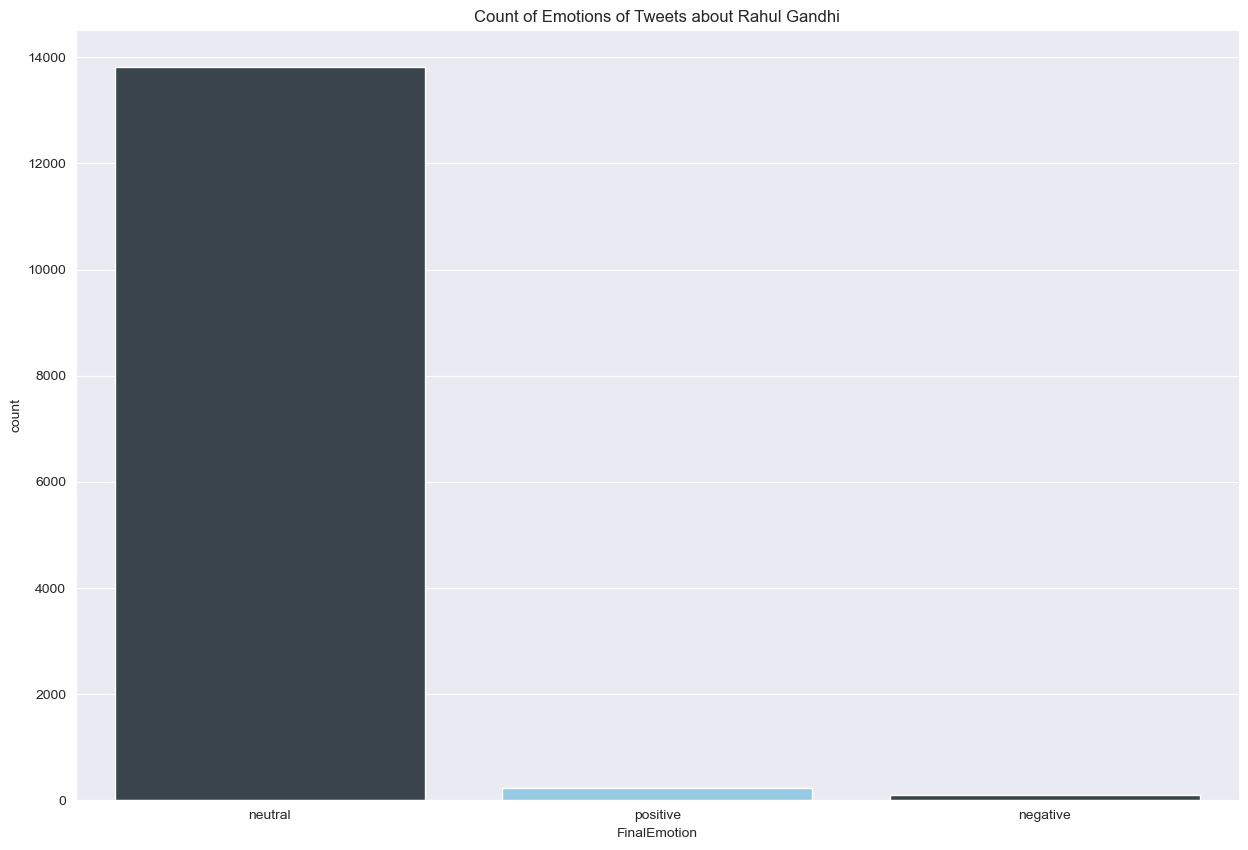

In [21]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=rahul_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Count of Emotions of Tweets about Rahul Gandhi')
plt.show()

# Modi and rahul tweets

In [22]:
df_Modi = pd.read_csv('./tweetsModi.csv',index_col=0)
df_Modi

,Date,User,Tweet
0,2019-05-12 01:17:12+00:00,narendramodi,Yet another phase of the 2019 Lok Sabha electi...
1,2019-05-09 02:00:26+00:00,narendramodi,Will be addressing five rallies today. \n\nLoo...
2,2019-05-08 13:41:51+00:00,narendramodi,Delhi has always given great love and affectio...
3,2019-05-06 01:18:46+00:00,narendramodi,Requesting all those voting in today’s fifth p...
4,2019-04-29 01:18:03+00:00,narendramodi,Another phase of the General Elections begins ...
...,...,...,...
60,2019-02-09 12:23:13+00:00,narendramodi,"During Congress rule, the headlines from the N..."
61,2019-02-08 01:57:45+00:00,narendramodi,"In the afternoon, I will address a public meet..."
62,2019-01-31 11:15:16+00:00,narendramodi,I thank the people of Jind for blessing @BJP4H...
63,2019-01-25 06:31:18+00:00,narendramodi,I urge people from all walks of life to create...


In [25]:
df_Rahul = pd.read_csv('./tweetsRG.csv',index_col=0)
df_Rahul

,Date,User,Tweet
0,2019-05-18 06:59:40+00:00,RahulGandhi,Greetings &amp; Best Wishes on the auspicious ...
1,2019-05-17 12:39:41+00:00,RahulGandhi,Congratulations Modi Ji. Excellent Press Confe...
2,2019-05-14 10:11:18+00:00,RahulGandhi,🇮🇳 🇮🇳 🇮🇳 I'm pushing for a new language in pol...
3,2019-05-09 16:01:12+00:00,RahulGandhi,"Dear Mr Modi,\n\nYour recent statements, inter..."
4,2019-05-05 05:45:31+00:00,RahulGandhi,"Modi Ji,\n\nThe battle is over. Your Karma awa..."
...,...,...,...
59,2019-01-09 15:29:53+00:00,RahulGandhi,"With all due respect Modi Ji, in our culture r..."
60,2019-01-08 10:02:46+00:00,RahulGandhi,The truth of Rafale will destroy Mr Modi. It’s...
61,2019-01-03 06:41:57+00:00,RahulGandhi,So it seems our PM has fled Parliament &amp; h...
62,2019-01-02 15:21:59+00:00,RahulGandhi,"Tomorrow, the PM faces an Open Book #RafaleDea..."


# Cleaning

In [26]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

# Modi's tweets
df_Modi['Tweet'] = df_Modi['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Rahul's tweets
df_Rahul['Tweet'] = df_Rahul['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Modi tweets sentiment

## Bert

In [29]:
df_Modi['FinalEmotion'] = df_Modi['Tweet'].apply(lambda x: sentiment_score(x))
df_Modi['FinalEmotion']=df_Modi['FinalEmotion'].apply(lambda x : 'Pos' if x==5 else ('Neg' if x==1 else 'Neu'))
df_Modi

,Date,User,Tweet,FinalEmotion
0,2019-05-12 01:17:12+00:00,narendramodi,Yet phase 2019 Lok Sabha elections here! Urgin...,Neu
1,2019-05-09 02:00:26+00:00,narendramodi,Will addressing rallies today. Looking forward...,Pos
2,2019-05-08 13:41:51+00:00,narendramodi,Delhi given great love affection BJP. In short...,Pos
3,2019-05-06 01:18:46+00:00,narendramodi,Requesting voting today’s fifth phase 2019 Lok...,Neu
4,2019-04-29 01:18:03+00:00,narendramodi,Another phase General Elections begins today. ...,Neu
...,...,...,...,...
60,2019-02-09 12:23:13+00:00,narendramodi,"During Congress rule, headlines Northeast indi...",Neg
61,2019-02-08 01:57:45+00:00,narendramodi,"In afternoon, I address public meeting Mainagu...",Pos
62,2019-01-31 11:15:16+00:00,narendramodi,I thank people Jind blessing @BJP4Haryana. Thi...,Pos
63,2019-01-25 06:31:18+00:00,narendramodi,I urge people walks life create awareness vote...,Pos


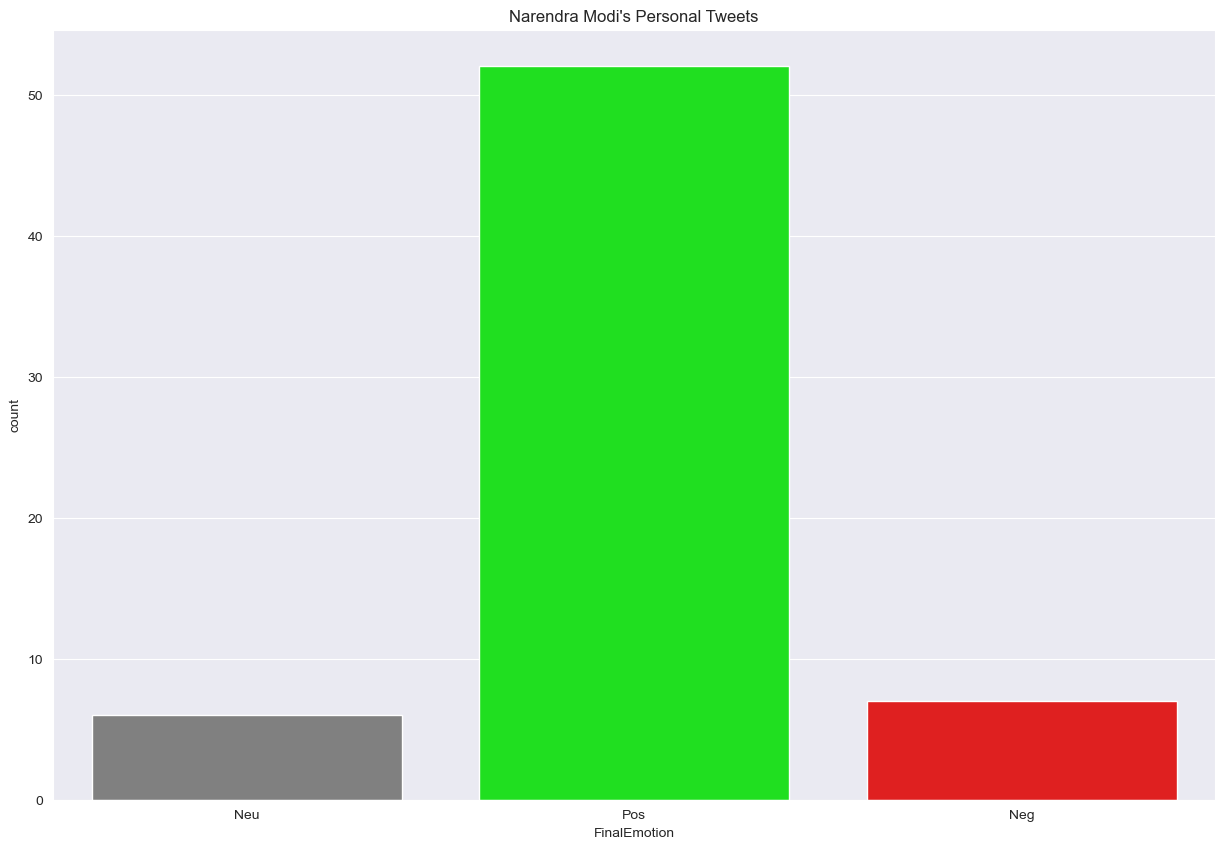

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
ax = sns.countplot(x=df_Modi['FinalEmotion'],palette=['#808080','#00FF00',"#FF0000"])
ax.set_title('Narendra Modi\'s Personal Tweets')
plt.show()

## Vader sentiment

In [31]:
df_Modi.drop('FinalEmotion',axis=1, inplace=True)

#  By Using Vader sentiment Analyzer

analyser = SentimentIntensityAnalyzer() # For polarity calculation

# positive polarity score calculator
def pos(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['pos']

# negative polarity score calculator
def neg(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neg']

# ne polarity score calculator
def neu(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neu']

# Applying on tweets
df_Modi['pos'] = df_Modi['Tweet'].apply(lambda x :pos(x))
df_Modi['neg'] = df_Modi['Tweet'].apply(lambda x :neg(x))
df_Modi['neu'] = df_Modi['Tweet'].apply(lambda x :neu(x))

# Final Emotions
ggez=[]
for i in range(0,65):
    ggez.append(max(df_Modi['pos'][i],df_Modi['neu'][i],df_Modi['neg'][i]))

df_Modi['FinalEmotion']=ggez
for i in range(0,65):
    if df_Modi['FinalEmotion'][i]==df_Modi['pos'][i]:
        df_Modi['FinalEmotion'][i]='positive'
    elif df_Modi['FinalEmotion'][i]==df_Modi['neg'][i]:
        df_Modi['FinalEmotion'][i]='negative' 
    elif df_Modi['FinalEmotion'][i]==df_Modi['neu'][i]:
        df_Modi['FinalEmotion'][i]='neutral'
df_Modi


C:\Users\haris\AppData\Local\Temp\ipykernel_16208\4038444319.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Modi['FinalEmotion'][i]='neutral'


,Date,User,Tweet,pos,neg,neu,FinalEmotion
0,2019-05-12 01:17:12+00:00,narendramodi,Yet phase 2019 Lok Sabha elections here! Urgin...,0.197,0.000,0.803,neutral
1,2019-05-09 02:00:26+00:00,narendramodi,Will addressing rallies today. Looking forward...,0.304,0.000,0.696,neutral
2,2019-05-08 13:41:51+00:00,narendramodi,Delhi given great love affection BJP. In short...,0.461,0.000,0.539,neutral
3,2019-05-06 01:18:46+00:00,narendramodi,Requesting voting today’s fifth phase 2019 Lok...,0.333,0.000,0.667,neutral
4,2019-04-29 01:18:03+00:00,narendramodi,Another phase General Elections begins today. ...,0.183,0.000,0.817,neutral
...,...,...,...,...,...,...,...
60,2019-02-09 12:23:13+00:00,narendramodi,"During Congress rule, headlines Northeast indi...",0.246,0.156,0.599,neutral
61,2019-02-08 01:57:45+00:00,narendramodi,"In afternoon, I address public meeting Mainagu...",0.178,0.000,0.822,neutral
62,2019-01-31 11:15:16+00:00,narendramodi,I thank people Jind blessing @BJP4Haryana. Thi...,0.500,0.000,0.500,positive
63,2019-01-25 06:31:18+00:00,narendramodi,I urge people walks life create awareness vote...,0.215,0.000,0.785,neutral


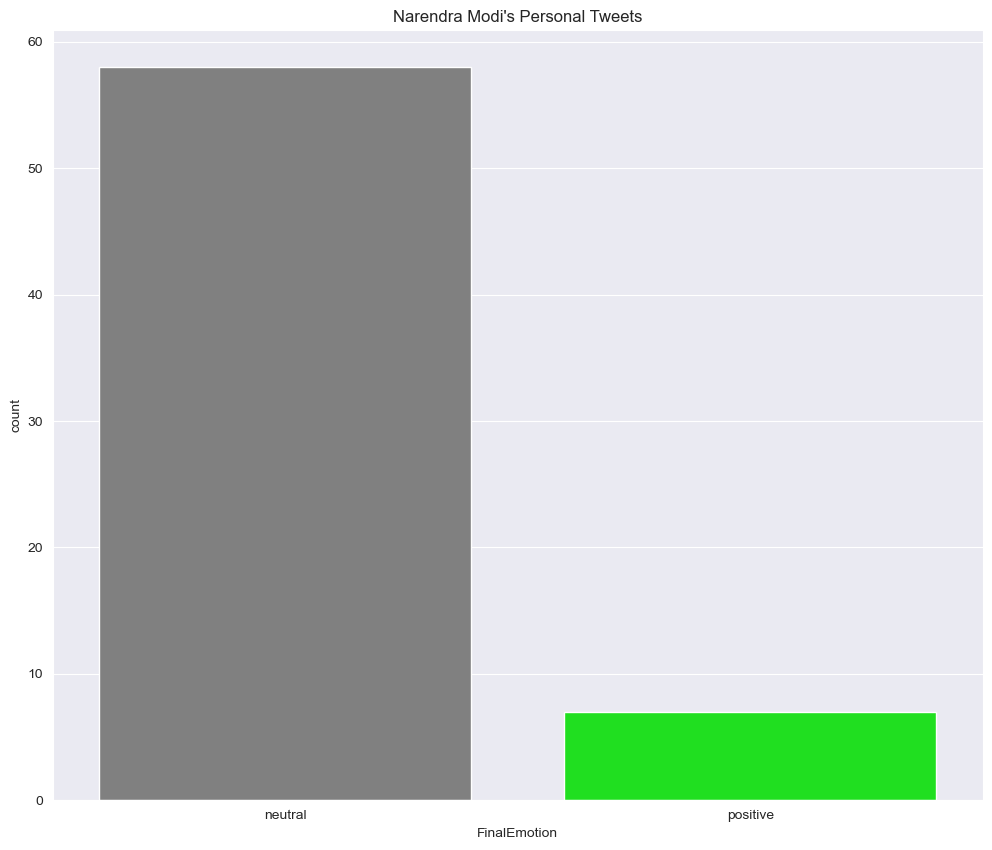

In [32]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x=df_Modi['FinalEmotion'],palette=['#808080','#00FF00',"#FF0000"])
ax.set_title('Narendra Modi\'s Personal Tweets')
plt.show()

## Text blob

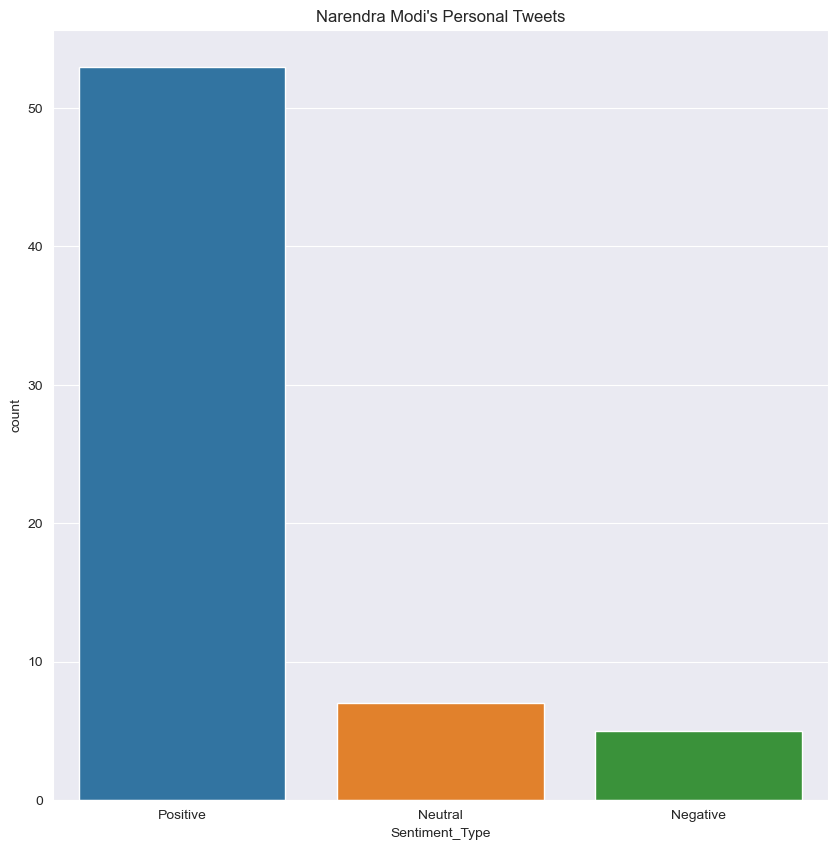

In [33]:
from textblob import TextBlob

bloblist_desc = list()

twit=df_Modi['Tweet'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)
ax.set_title('Narendra Modi\'s Personal Tweets')
plt.show()

# Sentiment For Rahul Gandhi's Tweets

## Bert

In [34]:
df_Rahul['FinalEmotion'] = df_Rahul['Tweet'].apply(lambda x: sentiment_score(x))
df_Rahul['FinalEmotion']=df_Rahul['FinalEmotion'].apply(lambda x : 'Pos' if x==5 else ('Neg' if x==1 else 'Neu'))
df_Rahul

,Date,User,Tweet,FinalEmotion
0,2019-05-18 06:59:40+00:00,RahulGandhi,Greetings &amp; Best Wishes auspicious occasio...,Pos
1,2019-05-17 12:39:41+00:00,RahulGandhi,Congratulations Modi Ji. Excellent Press Confe...,Pos
2,2019-05-14 10:11:18+00:00,RahulGandhi,🇮🇳 🇮🇳 🇮🇳 I'm pushing new language politics. Le...,Neg
3,2019-05-09 16:01:12+00:00,RahulGandhi,"Dear Mr Modi, Your recent statements, intervie...",Neu
4,2019-05-05 05:45:31+00:00,RahulGandhi,"Modi Ji, The battle over. Your Karma awaits yo...",Pos
...,...,...,...,...
59,2019-01-09 15:29:53+00:00,RahulGandhi,"With respect Modi Ji, culture respect women be...",Neg
60,2019-01-08 10:02:46+00:00,RahulGandhi,The truth Rafale destroy Mr Modi. It’s questio...,Neg
61,2019-01-03 06:41:57+00:00,RahulGandhi,So PM fled Parliament &amp; open book Rafale e...,Neg
62,2019-01-02 15:21:59+00:00,RahulGandhi,"Tomorrow, PM faces Open Book #RafaleDeal Exam ...",Neg


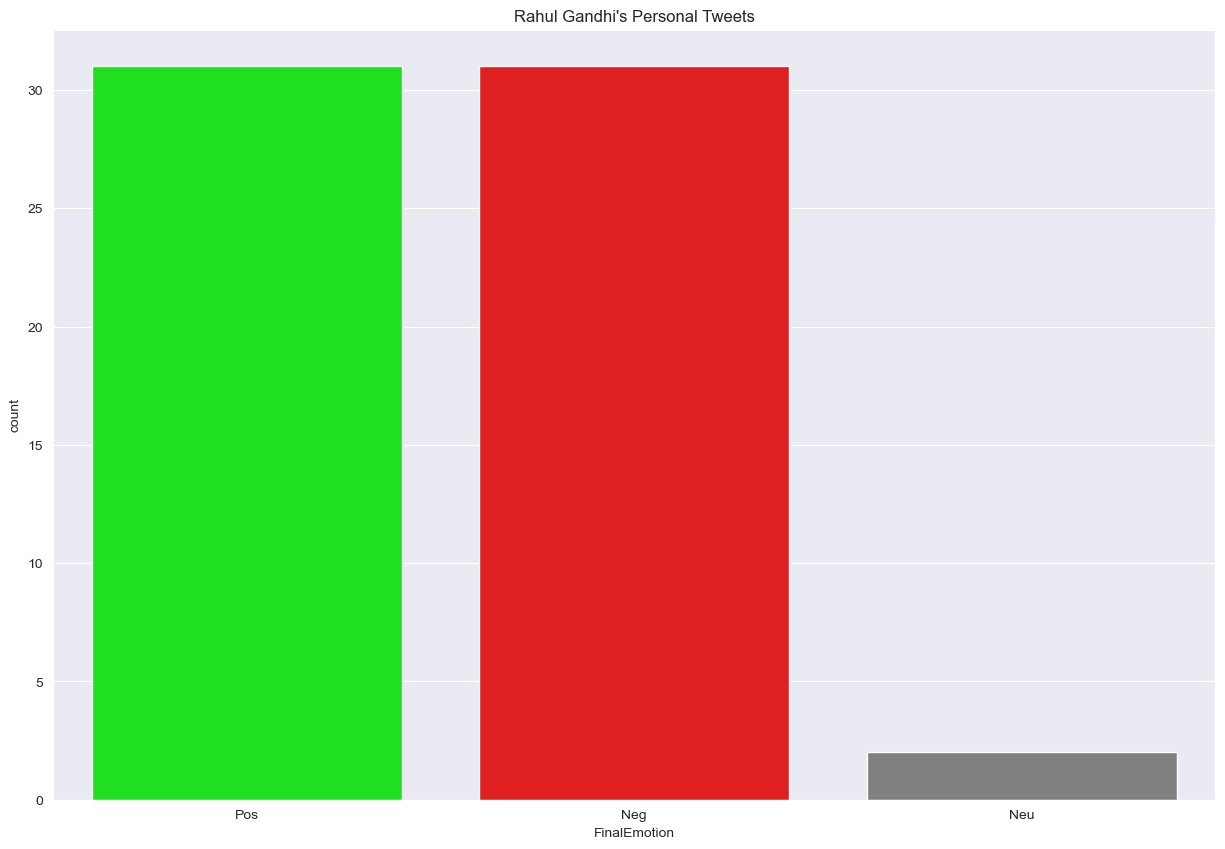

In [35]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=df_Rahul['FinalEmotion'],palette=['#00FF00',"#FF0000",'#808080'])
ax.set_title('Rahul Gandhi\'s Personal Tweets')
plt.show()

# Vadar sentiment

In [36]:
df_Rahul['pos'] = df_Rahul['Tweet'].apply(lambda x :pos(x))
df_Rahul['neg'] = df_Rahul['Tweet'].apply(lambda x :neg(x))
df_Rahul['neu'] = df_Rahul['Tweet'].apply(lambda x :neu(x))

ggez=[]
for i in range(0,64):
    ggez.append(max(df_Rahul['pos'][i],df_Rahul['neu'][i],df_Rahul['neg'][i]))

df_Rahul['FinalEmotion']=ggez

for i in range(0,64):
    if df_Rahul['FinalEmotion'][i]==df_Rahul['pos'][i]:
        df_Rahul['FinalEmotion'][i]='positive'
    elif df_Rahul['FinalEmotion'][i]==df_Rahul['neg'][i]:
        df_Rahul['FinalEmotion'][i]='negative' 
    elif df_Rahul['FinalEmotion'][i]==df_Rahul['neu'][i]:
        df_Rahul['FinalEmotion'][i]='neutral'


C:\Users\haris\AppData\Local\Temp\ipykernel_16208\671621923.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Rahul['FinalEmotion'][i]='positive'


In [37]:
df_Rahul['FinalEmotion'].value_counts()

neutral     50
positive    10
negative     4
Name: FinalEmotion, dtype: int64

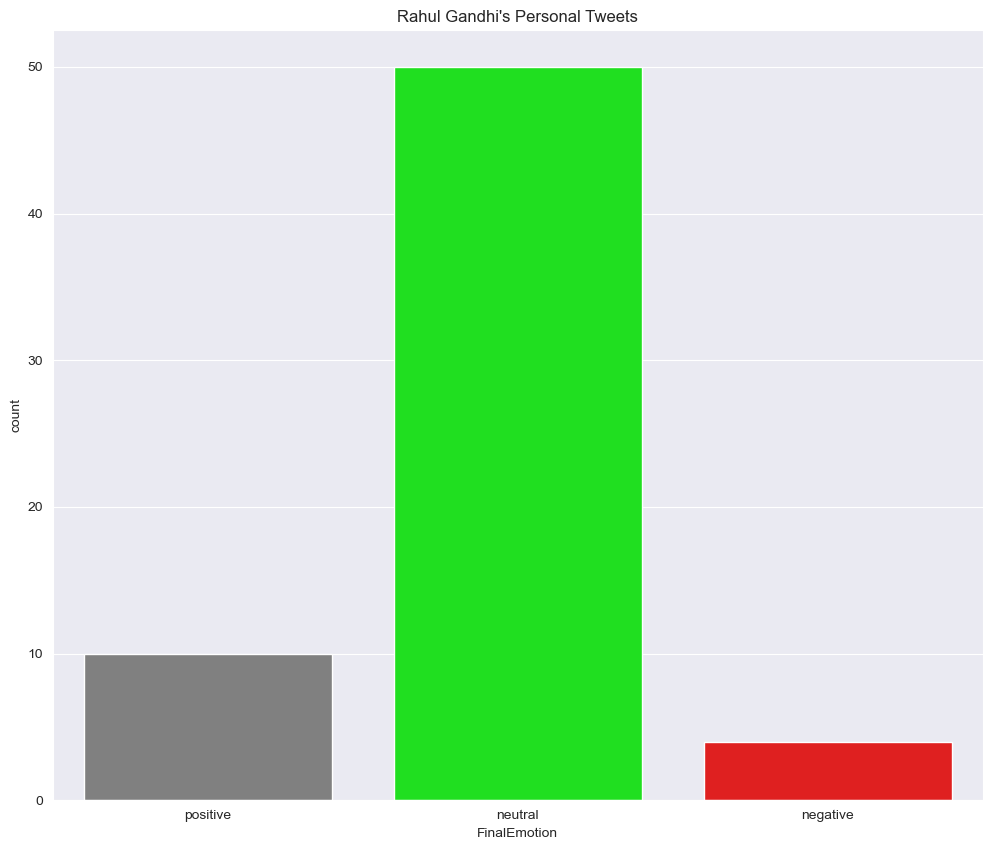

In [38]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x=df_Rahul['FinalEmotion'],palette=['#808080','#00FF00',"#FF0000"])
ax.set_title('Rahul Gandhi\'s Personal Tweets')
plt.show()

# Text Blob

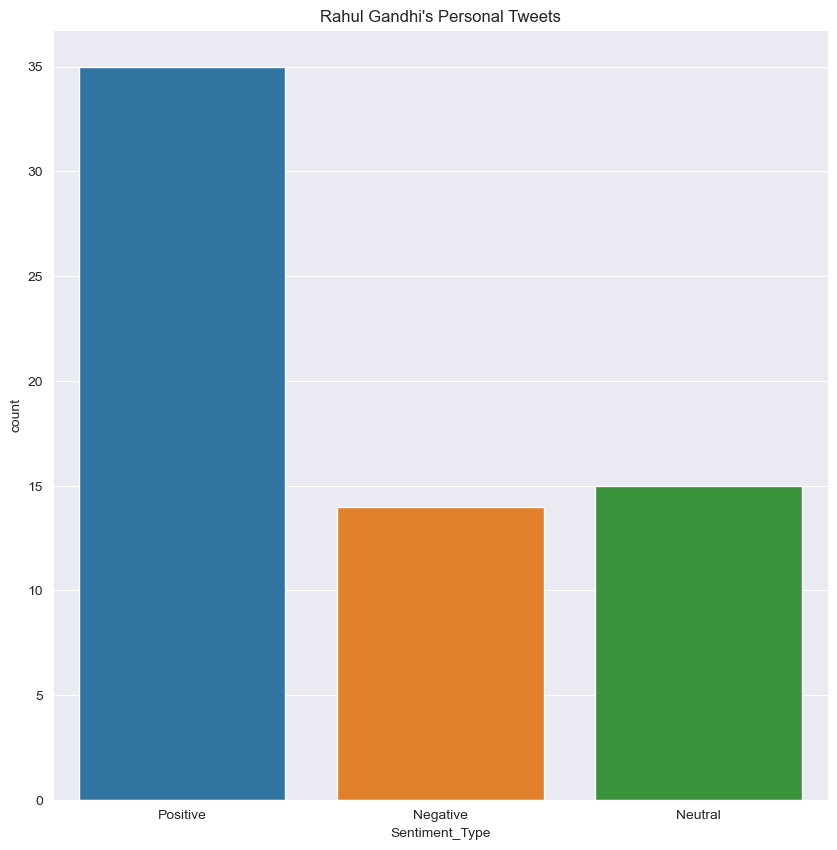

In [39]:
bloblist_desc = list()

twit=df_Rahul['Tweet'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)
ax.set_title('Rahul Gandhi\'s Personal Tweets')
plt.show()

# Comparision

In [40]:
dfNR=pd.concat([df_Modi,df_Rahul], axis=0)
dfNR=dfNR.reset_index(drop=True)
dfNR

,Date,User,Tweet,pos,neg,neu,FinalEmotion
0,2019-05-12 01:17:12+00:00,narendramodi,Yet phase 2019 Lok Sabha elections here! Urgin...,0.197,0.000,0.803,neutral
1,2019-05-09 02:00:26+00:00,narendramodi,Will addressing rallies today. Looking forward...,0.304,0.000,0.696,neutral
2,2019-05-08 13:41:51+00:00,narendramodi,Delhi given great love affection BJP. In short...,0.461,0.000,0.539,neutral
3,2019-05-06 01:18:46+00:00,narendramodi,Requesting voting today’s fifth phase 2019 Lok...,0.333,0.000,0.667,neutral
4,2019-04-29 01:18:03+00:00,narendramodi,Another phase General Elections begins today. ...,0.183,0.000,0.817,neutral
...,...,...,...,...,...,...,...
124,2019-01-09 15:29:53+00:00,RahulGandhi,"With respect Modi Ji, culture respect women be...",0.337,0.100,0.564,neutral
125,2019-01-08 10:02:46+00:00,RahulGandhi,The truth Rafale destroy Mr Modi. It’s questio...,0.232,0.131,0.637,neutral
126,2019-01-03 06:41:57+00:00,RahulGandhi,So PM fled Parliament &amp; open book Rafale e...,0.188,0.000,0.812,neutral
127,2019-01-02 15:21:59+00:00,RahulGandhi,"Tomorrow, PM faces Open Book #RafaleDeal Exam ...",0.000,0.000,1.000,neutral


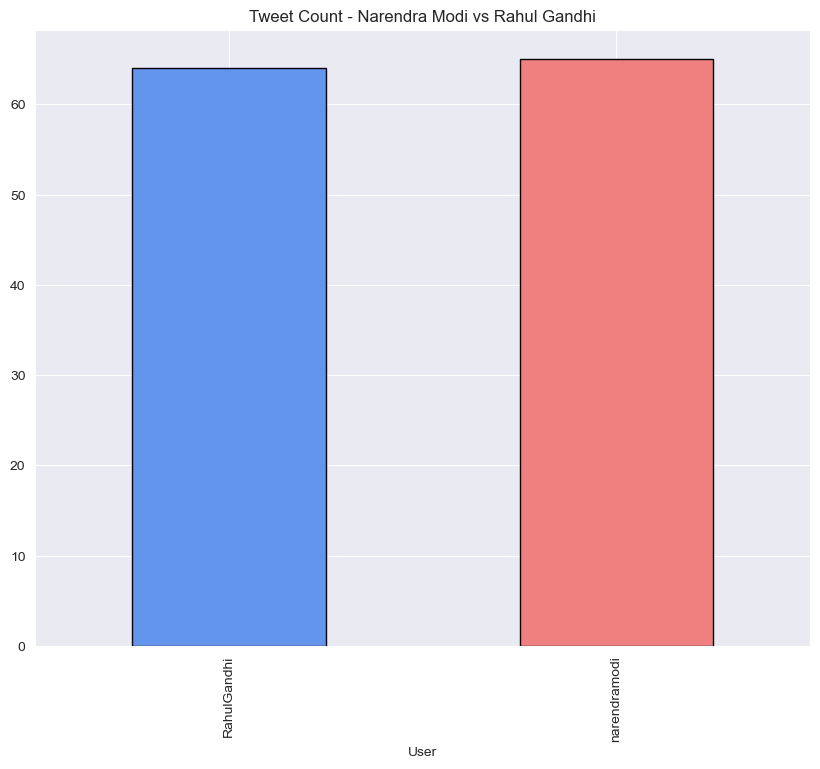

In [41]:
plt.figure(figsize=(10,8))
dfNR.groupby(['User']).count().Tweet.plot(kind='bar',title='Tweet Count - Narendra Modi vs Rahul Gandhi',edgecolor='black',color=['cornflowerblue','lightcoral'])
plt.show()

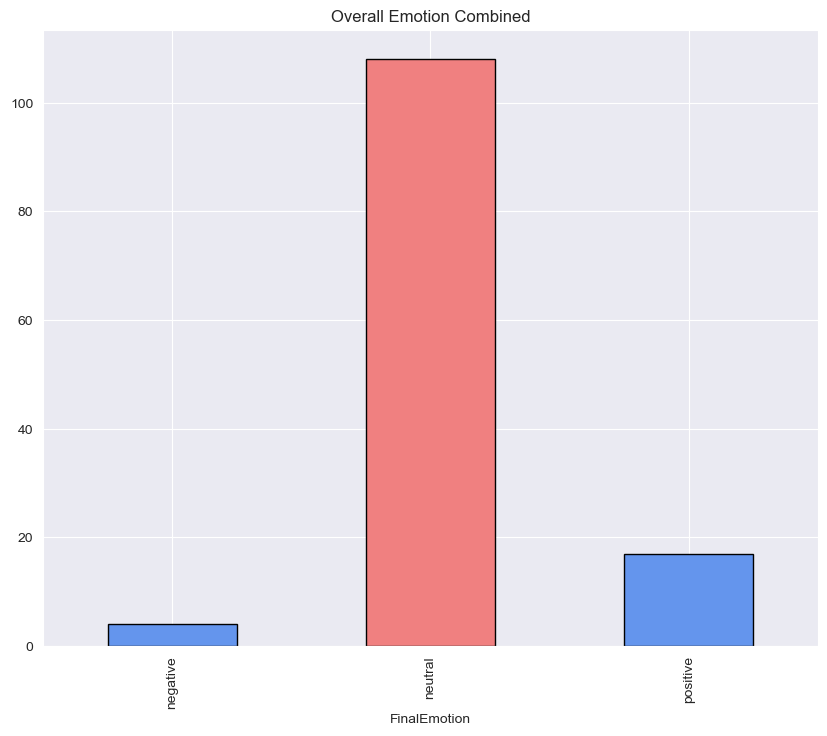

In [42]:
plt.figure(figsize=(10,8))
dfNR.groupby(['FinalEmotion']).count().Tweet.plot(kind='bar',title='Overall Emotion Combined',edgecolor='black',color=['cornflowerblue','lightcoral'])
plt.show()

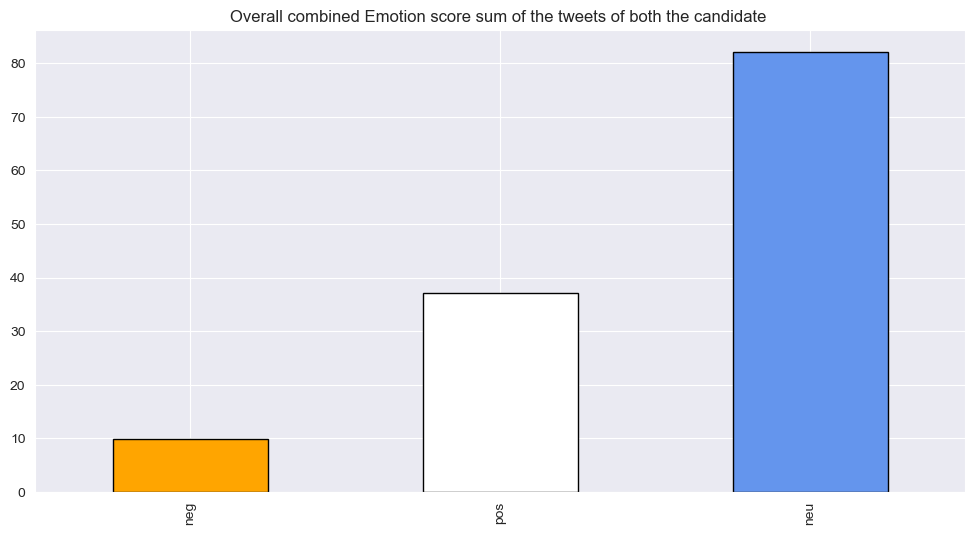

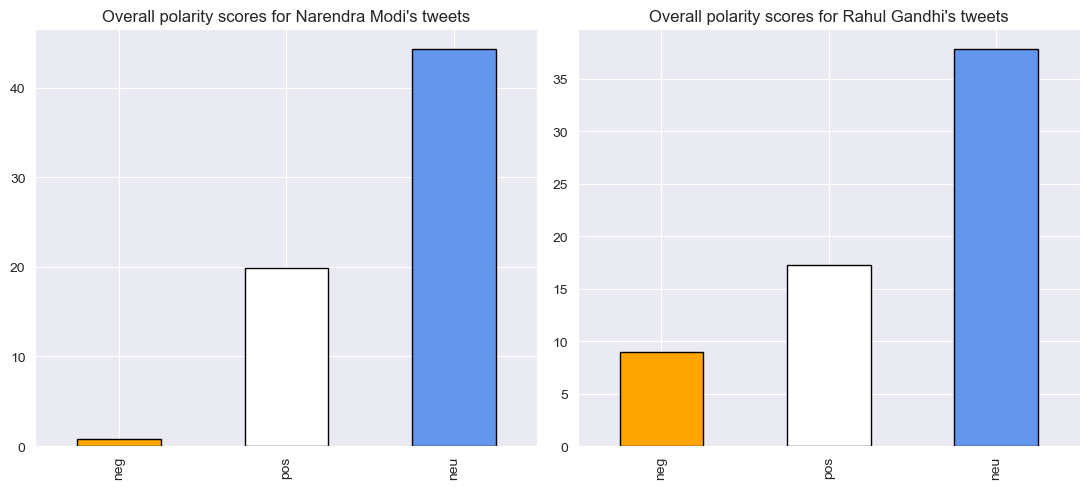

In [43]:
plt.figure(figsize=(12,6))

dfNR[['neg','pos','neu']].sum().plot(kind='bar',title='Overall combined Emotion score sum of the tweets of both the candidate ',edgecolor='black',color=['orange','white','cornflowerblue'])
plt.show()

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
df_Modi[['neg','pos','neu']].sum().plot(kind='bar',title="Overall polarity scores for Narendra Modi's tweets",edgecolor='black',color=['orange','white','cornflowerblue'])

plt.subplot(1,2,2)
df_Rahul[['neg','pos','neu']].sum().plot(kind='bar',title="Overall polarity scores for Rahul Gandhi's tweets",edgecolor='black',color=['orange','white','cornflowerblue'])

plt.tight_layout()
plt.show()
